Jupyter Notebook using Python 3.11.9 for Analysing the recorded data in the data folder and for generating beautiful graphs

In [65]:
# Import required packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [66]:
# Load Data
spring_1_data = pd.read_csv('data/spring-1.csv')
spring_2_data = pd.read_csv('data/spring-2.csv')
spring_series_data = pd.read_csv('data/series.csv')
spring_parallel_data = pd.read_csv('data/parallel.csv')

# in Kg
loads = np.array([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.15, 0.2])

In [67]:
loads_data = pd.DataFrame(loads, columns=['weights'])
loads_data['Force'] = [x * 9.81 for x in loads_data['weights']]

In [68]:
# Calculate Mean Average from each Row
spring_1_data['Average'] = [np.mean(spring_1_data.to_numpy()[i]) for i in range(spring_1_data.shape[0])]
spring_2_data['Average'] = [np.mean(spring_2_data.to_numpy()[i]) for i in range(spring_2_data.shape[0])]
spring_series_data['Average'] = [np.mean(spring_series_data.to_numpy()[i]) for i in range(spring_series_data.shape[0])]
spring_parallel_data['Average'] = [np.mean(spring_parallel_data.to_numpy()[i]) for i in range(spring_parallel_data.shape[0])]

In [69]:
# Calculate height difference from reference unloaded
spring_1_data['height'] = [abs(i - spring_1_data['Average'][0]) for i in spring_1_data['Average']]
spring_2_data['height'] = [abs(i - spring_2_data['Average'][0]) for i in spring_2_data['Average']]
spring_series_data['height'] = [abs(i - spring_series_data['Average'][0]) for i in spring_series_data['Average']]
spring_parallel_data['height'] = [abs(i - spring_parallel_data['Average'][0]) for i in spring_parallel_data['Average']]

In [70]:
# Create Plot Data
df_plot_f1 = pd.DataFrame({'force': loads_data['Force'], 'length': spring_1_data['height']})
df_plot_f2 = pd.DataFrame({'force': loads_data['Force'], 'length': spring_2_data['height']})
df_plot_series = pd.DataFrame({'force': loads_data['Force'], 'length': spring_series_data['height']})
df_plot_parallel = pd.DataFrame({'force': loads_data['Force'], 'length': spring_parallel_data['height']})

z_1 = np.polyfit(df_plot_f1['force'].to_numpy(), df_plot_f1['length'].to_numpy(), 1)
p_1 = np.poly1d(z_1)

z_2 = np.polyfit(df_plot_f2['force'].to_numpy(), df_plot_f2['length'].to_numpy(), 1)
p_2 = np.poly1d(z_2)

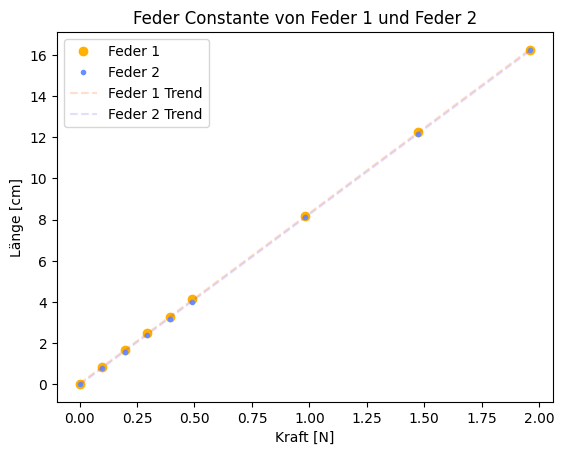

In [71]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot('force', 'length', data=df_plot_f1, linestyle='none', marker='o', color='#ffb000', label='Feder 1')
ax.plot('force', 'length', data=df_plot_f2, linestyle='none', marker='.', color='#648fff', label='Feder 2')
ax.plot(df_plot_1['force'], p_1(df_plot_1['force']), '--', color='#fe6100', label='Feder 1 Trend', alpha=0.2)
ax.plot(df_plot_2['force'], p_2(df_plot_2['force']), '--', color='#785ef0', label='Feder 2 Trend', alpha=0.2)

ax.set(
    title='Feder Constante von Feder 1 und Feder 2',
    xlabel='Kraft [N]',
    ylabel='Länge [cm]',
    )
ax.legend(loc='best')

plt.show()

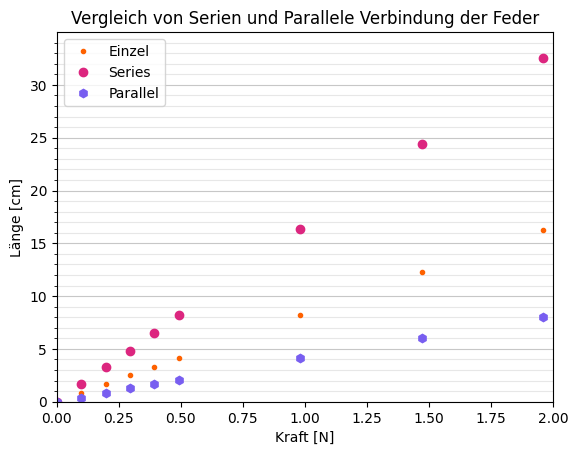

In [72]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot('force', 'length', data=df_plot_f1, linestyle='none', marker='.', color='#fe6100', label='Einzel')
ax.plot('force', 'length', data=df_plot_series, linestyle='none', marker='o', color='#dc267f', label='Series')
ax.plot('force', 'length', data=df_plot_parallel, linestyle='none', marker='h', color='#785ef0', label='Parallel')

major_ticks = np.arange(0, 35, 5)
minor_ticks = np.arange(0, 35, 1)

ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(visible=True, which='major', axis='y', alpha=0.7)
ax.grid(visible=True, which='minor', axis='y', alpha=0.3)
ax.set(
    title='Vergleich von Serien und Parallele Verbindung der Feder',
    xlabel='Kraft [N]',
    ylabel='Länge [cm]',
    xlim=[0, 2],
    ylim=[0, 35]
    )
ax.legend(loc='best')

plt.show()
